In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets.samples_generator import make_blobs


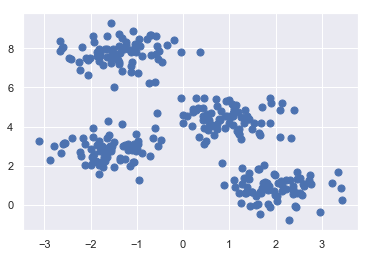

In [33]:
X,y_true=make_blobs(n_samples=300, centers=4, cluster_std=0.60,random_state=0)
plt.scatter(X[:,0],X[:,1],s=50)

In [34]:
#assign four cluster
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)

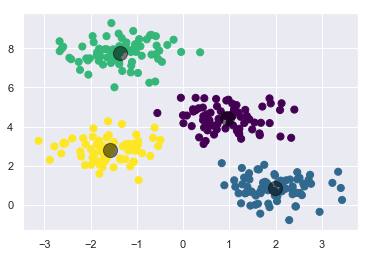

In [36]:
#import library
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X,n_clusters,rseed=2):
    #1:: randomly choosing clusters
    rng=np.random.RandomState(rseed)
    i=rng.permutation(X.shape[0])[:n_clusters]
    centers=X[i]
    
    while True:
        #2:: assign labels based on closest center
        labels=pairwise_distances_argmin(X,centers)
        #3::find new centers from means of points
        new_centers=np.array([X[labels==i].mean(0)
                                for i in range(n_clusters)])
        #4::check for convergence
        if np.all(centers == new_centers):
            break
        centers=new_centers
    return centers,labels
centers,labels = find_clusters(X,4)
plt.scatter(X[:,0],X[:,1], c=y_kmeans, s=50, cmap='viridis')

plt.scatter(centers[:,0],centers[:,1], c='black', s=200, alpha=0.5)